<a href="https://colab.research.google.com/github/udx1/Machine-Learning-Specialization/blob/main/AllLifeBank_Personal_Loan_ML/AllLife_Bank_Personal_Loan_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [5]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [6]:
# Libraries required for data loading, manipulation and analysis
import pandas as pd
import numpy as np  # Linear algebra

# Libraries required for Visualization.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Library required for selecting the training and test data
from sklearn.model_selection import train_test_split

# Library for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Library for model performance evaluation.
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# Library for warnings to filter them.
import warnings
warnings.filterwarnings("ignore")



In [7]:
# Library required to load data from Google drive.
from google.colab import drive

# Mount the drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset

In [8]:
# Load data google drive.
loan_data = pd.read_csv('/content/drive/MyDrive/PGP-AIML/M2 : Machine Learning/Project/Loan_Modelling.csv')

# Create a working copy
data = loan_data.copy()


## Data Overview

### Check for shape of the data

In [9]:
data.shape

(5000, 14)

**Observation:**  There are 5000 rows and 14 columns in the data set

### Check for top 5 and bottom 5 records.

In [10]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [11]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### Check for attribute types

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observations:** There are 14 numeric and zero categorical features in the data set.

### Check the statistical summary of the numerical features

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Observations:**

* The customer base has an average age of 45 years, with a range from 23 to 67 years.
* Average professional experience among customers is 20 years.
* The average annual income is 73K, with a distribution ranging from 8K to 224K.
* Family size ranges from 1 to 4 individuals, with the average near the 50th percentile, indicating a normal distribution.
* Monthly customer spending averages approximately 2K, with the range extending from minimal spending to highs of around 10K.
* Customer education levels fall within a range of 1 to 3 (on an unspecified scale).
* Customer mortgages range from 100K to 635K.
* Ownership of Securities or CD accounts appears to be low among the customer base.


### Check for missing data

In [14]:
data.isna().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


**Observations:** There are no missing values in the data set.

### Check for duplicate records in the data set.

In [15]:
data.duplicated().sum()

np.int64(0)

**Observations:** There are no duplicate records in the data set.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

#### Check for the distribution of the data


In [16]:
# Function to plot boxplot and histogram together.
def plot_box_histogram(data, feature, kde=False, figsize=(4,3)):
  """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    kde: whether to show the density curve (default False)
    figsize: size of figure (default (5,4))
    """

  f2, (ax_box2, ax_hist2) = plt.subplots(
      nrows=2,        # Number of rows of the subplot grid= 2
      sharex=True,    # x-axis will be shared among all subplots
      gridspec_kw={"height_ratios": (0.3, 0.7)},
      )  # creating the 2 subplots

  sns.boxplot(
      data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
      )  # boxplot will be created and a triangle will indicate the mean value of the column
  sns.histplot(
      data=data, x=feature, kde=True, ax=ax_hist2
      )
  ax_hist2.axvline(
      data[feature].mean(), color="green", linestyle="--"
      )  # Add mean to the histogram
  ax_hist2.axvline(
      data[feature].median(), color="black", linestyle="-"
      )  # Add median to the histogram

  plt.tight_layout()
  #plt.show()


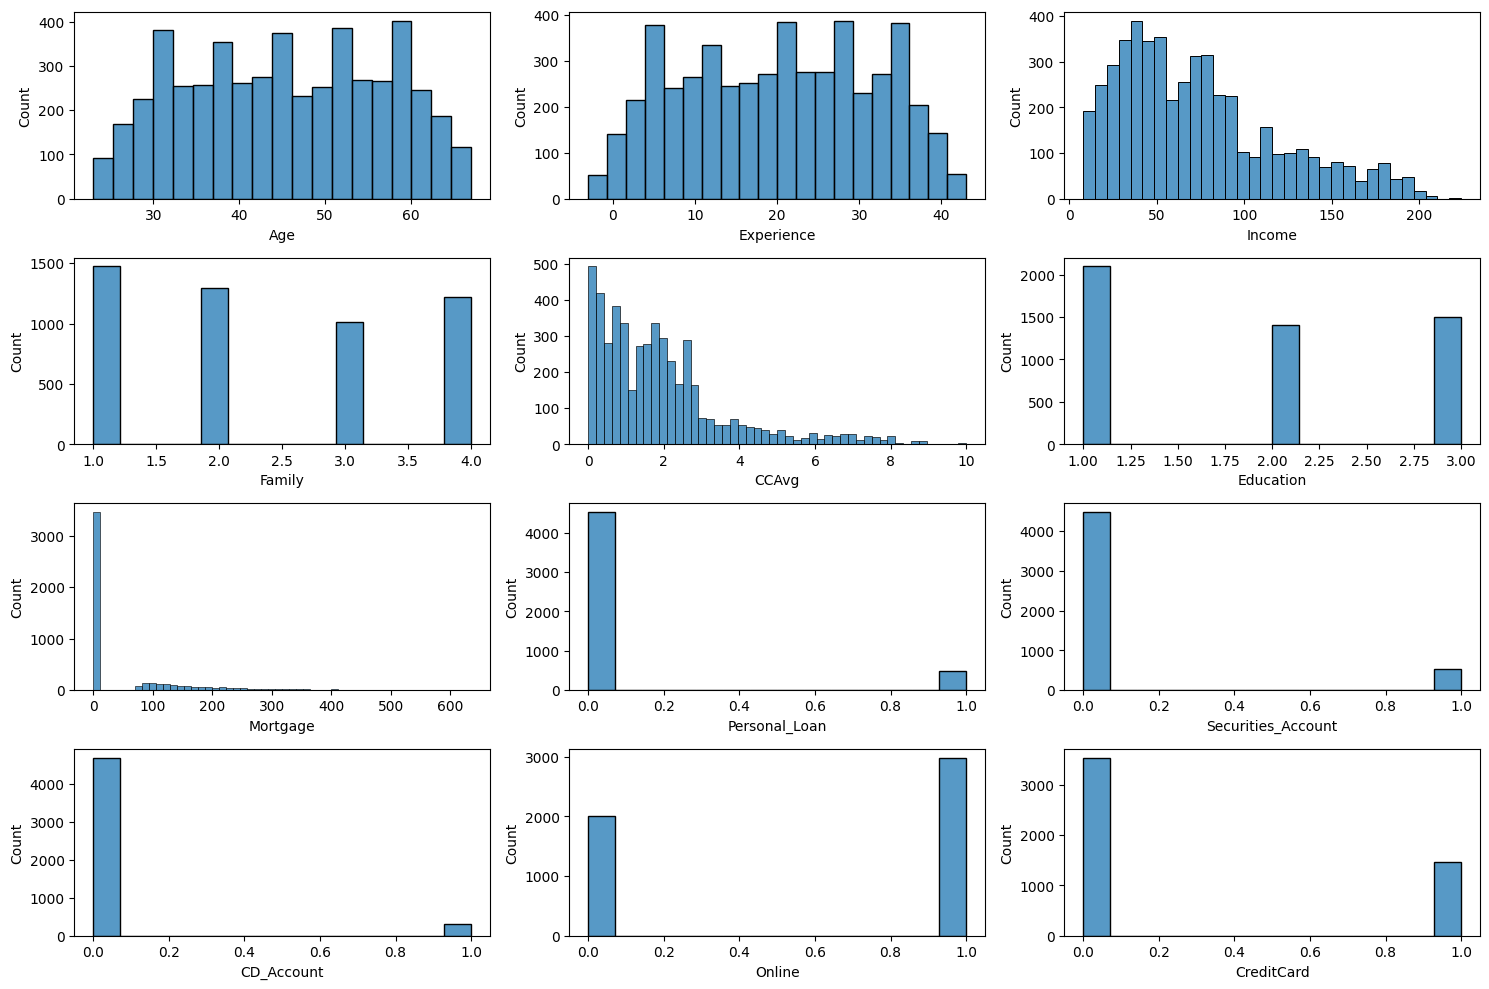

In [17]:
# Define the figure size
plt.figure(figsize=(15,10))

# Create a list of numerical features.
num_features = data.select_dtypes(include="number").columns.to_list()

# Remove Id, Zipcodes from the num features.
num_features.remove("ID")               # ID is an identifier, doesn't effect the outcome.
num_features.remove("ZIPCode")          # ZIPCode is more of a categorical feature than a numeric one.

# Plot histogram for each numerical feature
for i, feature in enumerate(num_features):

    plt.subplot(4,3,i+1)                # Assign a subplot in the main plot.

    # Plot histgram using seaborn histplot
    sns.histplot(data=data, x=feature, palette='viridis')

plt.tight_layout()                      # add space between the plots.
plt.show()



**Observations:**

-  Age and Experience are exhibiting multimodal distribution.
-  Income and CCAvg features are exhibiting right-skewed distribution.
-  Customers with no mortgage are significantly high, compared to customers with mortgage.
- Personal Loan, Securities Account, CD Account, Onlione and CreditCard data seems to more categorical than numeric.



#### Plot boxplots to review the distribution and outliers


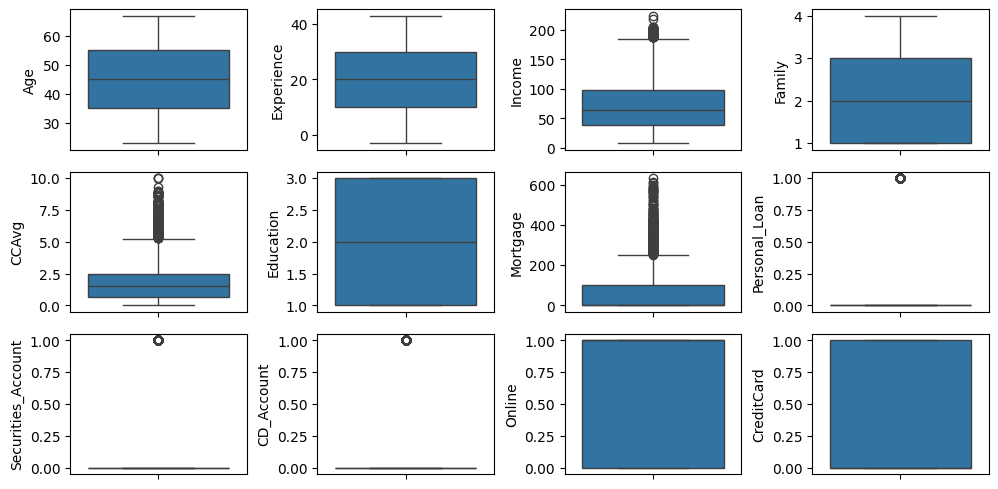

In [18]:
# Define the figure size
plt.figure(figsize=(10,5))

# Plot boxdiagram for each feature.
for i, feature in enumerate(num_features):
  plt.subplot(3,4,i+1)                # Assign a subplot.
  sns.boxplot(data=data, y=feature)   # Draw boxplot

plt.tight_layout()                    # Add space between the plots.
plt.show()


**Observations:**
* Income, CCAvg, and Mortgage features have outliers.

#### Analyze the features with discrete values.

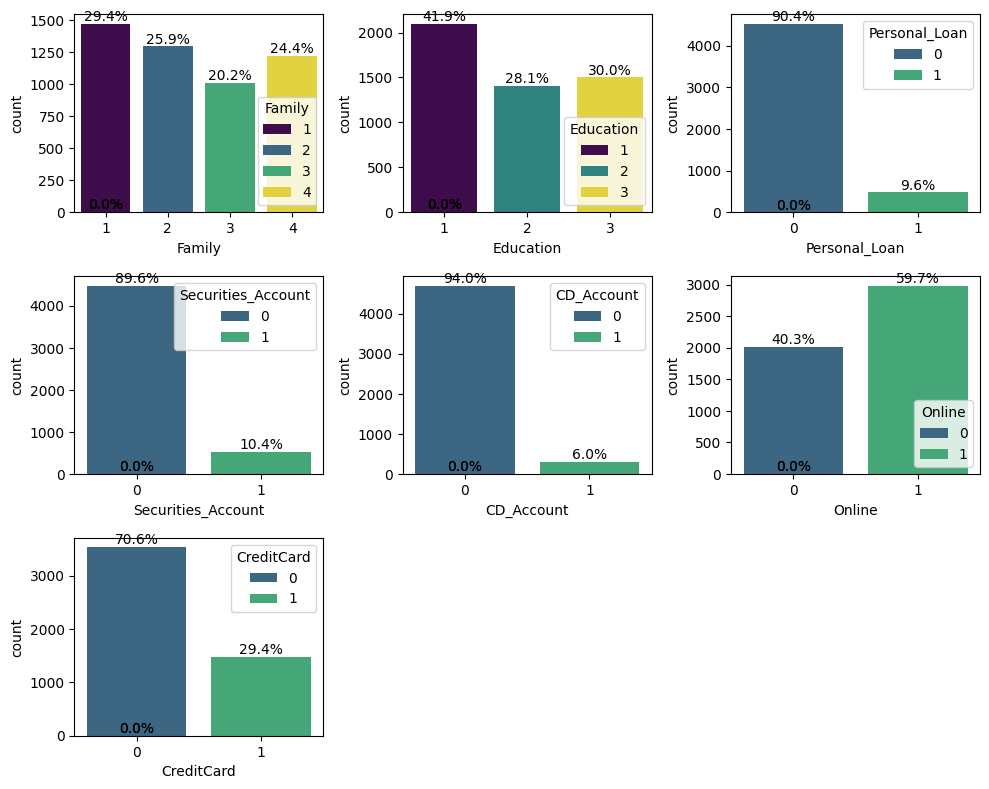

In [19]:
# Define distrete_features
dis_features = ['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online','CreditCard']

# Define the figure size.
plt.figure(figsize=(10,8))

# Plot count plot for each discrete feature
for i, feature in enumerate(dis_features):
  plt.subplot(3,3,i+1)                                                # Assign subplot
  ax = sns.countplot(data=data, x=feature, hue=feature, palette='viridis') # Draw count plot.

  for p in ax.patches:
    label = "{:.1f}%".format(100*p.get_height()/len(data[feature]))
    x = p.get_x() + p.get_width()/2  # Width of the plot.
    y = p.get_height()+1             # Height of the plot.

    ax.annotate(
        label,
        (x,y),
        ha="center",
        va="bottom",
    )         # Add % on each bar.

plt.tight_layout()      # Assign space
plt.show()


**Observations:**
* Customers count decreases with increase in family size.
* 90.4% of customers have nno personal loans.
* Only 10.4% customers have securities account.
* Only 6% customers have CD account.
* Nearly 60% of customers use internet banking.
* 30% of customers have credit cards issued by other banks.


#### Analyze the mortgage feature

3462 customers have no mortgage, that is 69% of the data


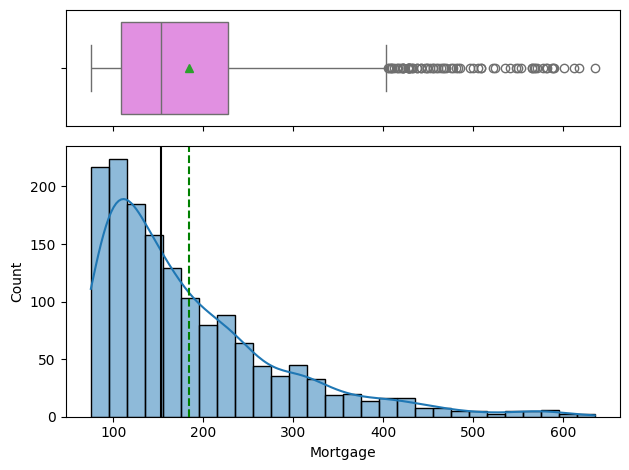

In [20]:
    non_zero_mortgage = data[data['Mortgage'] != 0]

    zero_mortgage_customers = data.shape[0] - non_zero_mortgage.shape[0]

    print("{} customers have no mortgage,".format(zero_mortgage_customers),
          "that is {}% of the data".format(round(100*zero_mortgage_customers/data.shape[0]),2))

    plot_box_histogram(data=non_zero_mortgage, feature='Mortgage', kde=True, figsize=(3,2))

**Observations:**
* Customers with Mortgage exhibits right skewed distribution, indicating that no. of customers goes down  with increase in loan amount.
* Only 31% of the customers have mortgage.

#### Credit Card data analysis

In [21]:
# Credit card value count.
print("Percentage of credit card data:\n", 100*data['CreditCard'].value_counts(normalize=True))

Percentage of credit card data:
 CreditCard
0    70.6
1    29.4
Name: proportion, dtype: float64


### Bivariate Analysis

#### Plot Heamap to review the correlation between the features


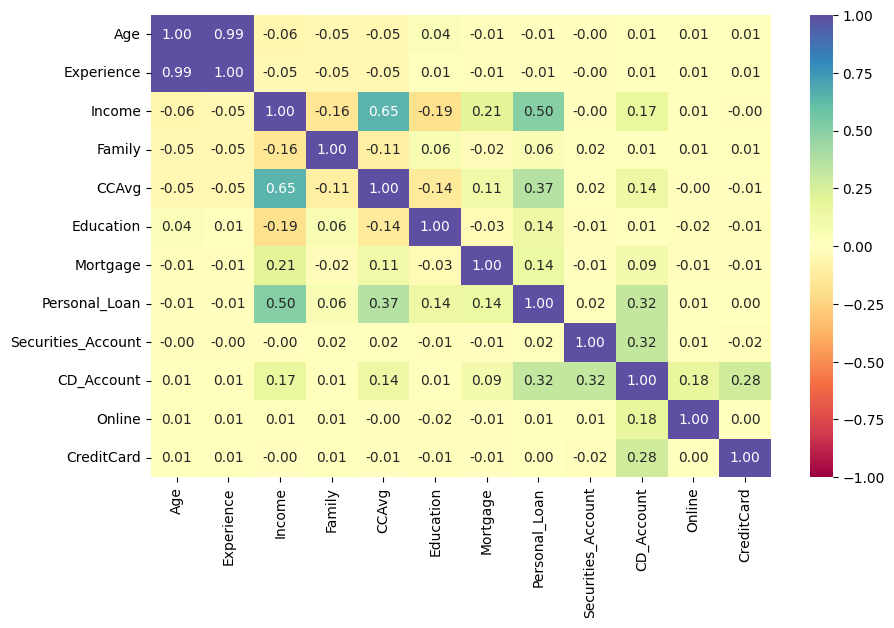

In [22]:
plt.figure(figsize=(10,6))  # Set the figure

sns.heatmap(data[num_features].corr(), vmin=-1, vmax=+1, annot=True, fmt='.2f', cmap="Spectral")
plt.show()


**Observations:**

* Age and Experience have strong positive correlation.
* Income exhibits a positive correlation with Peronal Loan and Average monthly credit card spending.
* Income has weak correlation with Mortgage.
* Investment accounts such Securities_account, CD_account exhibit some correlation.

#### Plot heat map of all numerical features.

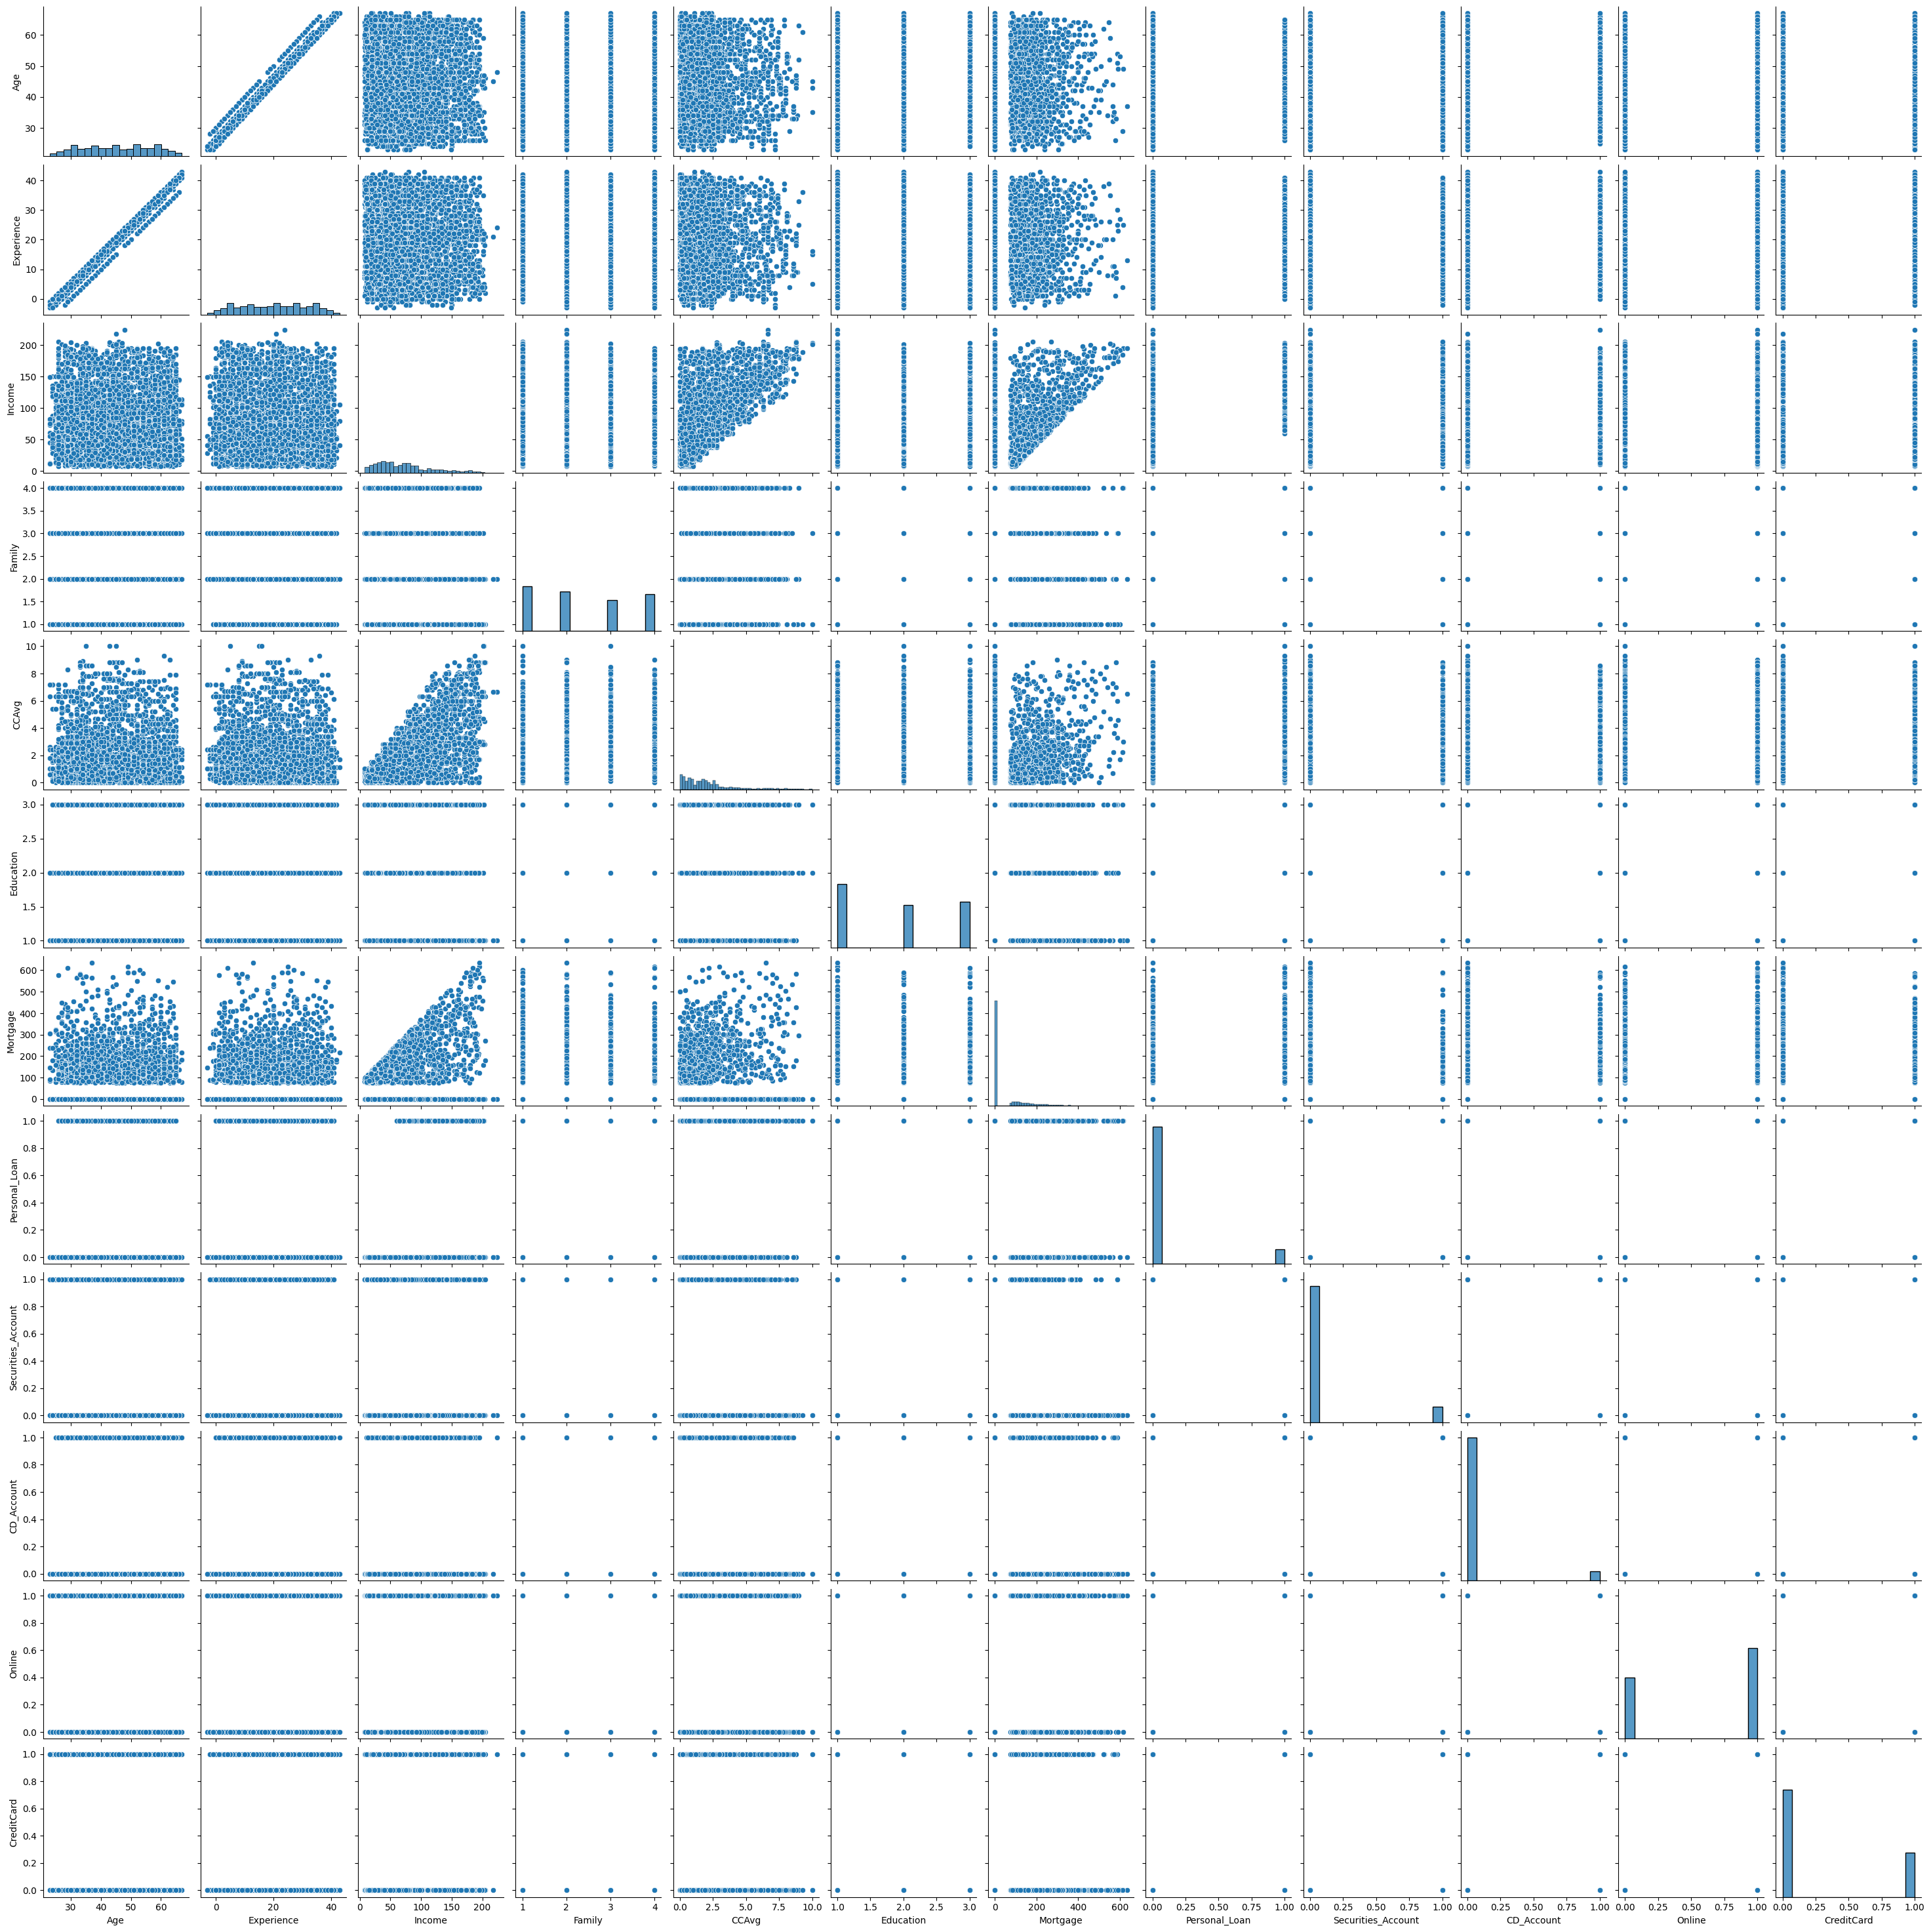

In [23]:
# Plot pairplot to review the distribution and correlation.
sns.pairplot(data=data[num_features]);

#### **Personal Loan vs Income, Age, Credit card average spend, Mortgage, Securities Account, CD Account**

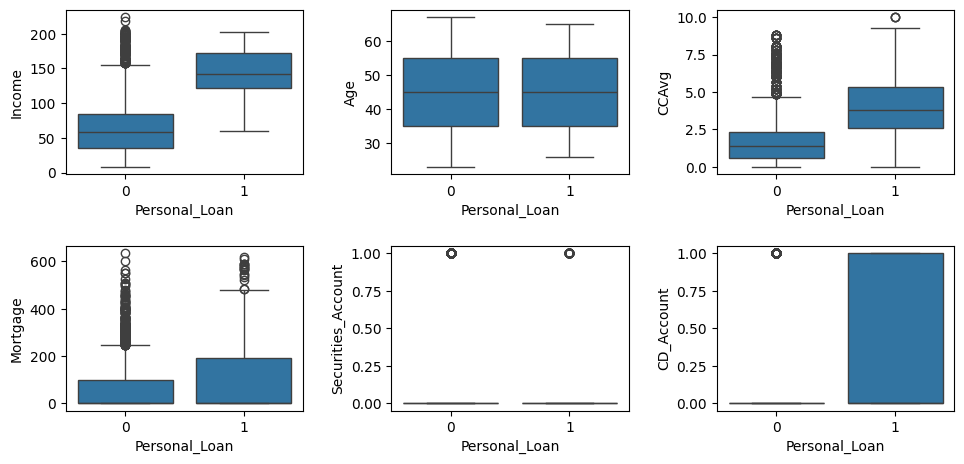

In [24]:
# deine the features for analysis.
features = ['Income', 'Age', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account']

# Create a figure.
plt.figure(figsize=(10, 5))

# Plot a boxplot for each features data by Personal Loan.
for i, feature in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(data=data, y=feature, x='Personal_Loan')
  plt.tight_layout(pad=2)

plt.show()


#### Personal Loan vs Family, Education, Personal_Loan, Securities_Account, CD_Account, Online,CreditCard

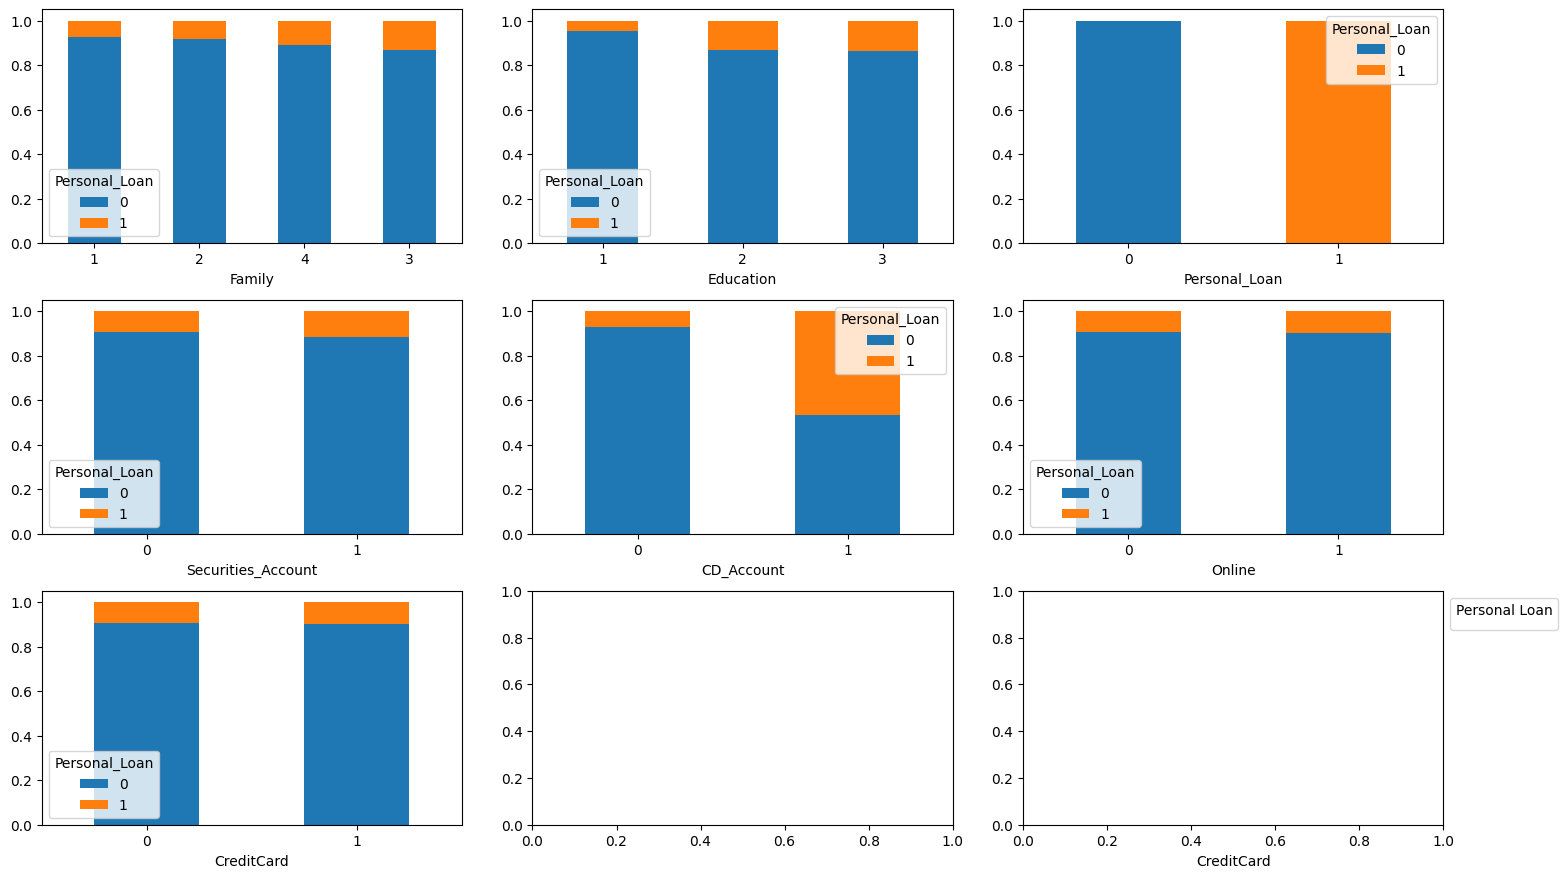

In [25]:
# Define distrete_features
dis_features = ['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online','CreditCard']


# Define no. of rows and columns for plotting.
nrows = 3
ncols = 3

# Create the plots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,9))
plt.tight_layout(pad=2)

axes_flat = axes.flatten()
# Plot a stacked bar graph for each feature.
for  i, feature in enumerate(dis_features):
  # Creating a crosstab for Family vs Peronal Loan
  tab = pd.crosstab(
      data[feature],
      data['Personal_Loan'],
      normalize='index'   # normalzing by dividing each row by its row total
  ).sort_values(by=0, ascending=False)  # sorting the resulting crosstab.

  # Get the specific axis object for the current loop iteration
  # The index 'i' maps directly to the flattened axes list
  ax = axes_flat[i]

  # Plot the stacked bar chart
  tab.plot(kind='bar', stacked=True, ax=ax, rot=0)
  plt.xlabel(feature)
  plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Personal Loan')

plt.show()




**Observations:**
* Seventy-five percent of personal loan acceptances are from customers earning more than \$100,000 annually.
* The minimum annual income observed among customers accepting a personal loan is \$50,000.
* The age demographics are uniformly distributed among the personal loan recipient group.
* Seventy-five percent of customers spend, on average, more than \$2,000 monthly using their credit cards.
* Among those who accepted personal loans, seventy-five percent hold a mortgage loan with a value under \$200,000.
* A majority of personal loan recipients also maintain a Certificate of Deposit (CD) account with the institution.

#### Personal Loan vs Age

<Axes: xlabel='Age', ylabel='Personal_Loan'>

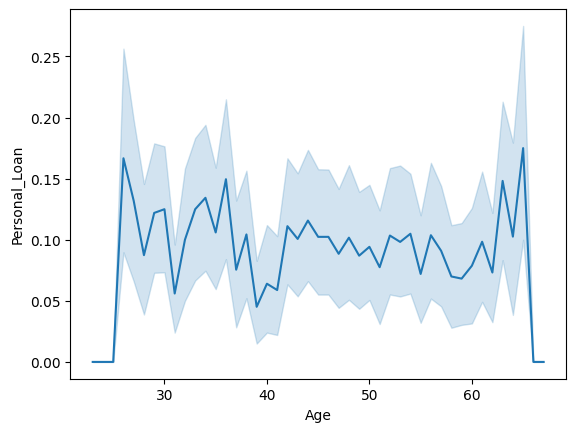

In [74]:
# Plot a line plot between Age and Personal Loan

sns.lineplot(data=data, x='Age', y='Personal_Loan', )

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Prepare Data for Modeling



In [26]:
y = data['Personal_Loan']                                # Target feature
X = data.drop(columns=['ID', 'Personal_Loan']).copy()    # Training features

* There are no missing values in the data.
* There are outliers, but not treating them as the DecisionTreeclassifier handles them well.
* There are no categorical variables to treat.

## Model Building

### Model Evaluation Criterion

In [27]:
# Split the data in a 80:20 ratio for train and test data sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=42 )

In [28]:
print("Shape of the Training data set:", X_train.shape)
print("Shape of the Test data set:", X_test.shape)
print("\nPercentage of classes in the training set ")
print(100*y_train.value_counts(normalize=True))
print("\nPercentage of classes in the test set ")
print(100*y_test.value_counts(normalize=True))


Shape of the Training data set: (3500, 12)
Shape of the Test data set: (1500, 12)

Percentage of classes in the training set 
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64

Percentage of classes in the test set 
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64


### Model Building

#### Default DecisionTreeClassifer

In [29]:
# Create an instance of DeciscionTreeClassifer
dtree1 = DecisionTreeClassifier(random_state=42)

# Fit and Train the model.
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Model Evaluation

In [30]:
# Utility function to determine the performance metrics.
def model_performance_classification(model, predictors, target):
  """
   Function to compute the model peformance metrics.

   model : DecisionTreeClassifer model.
   predictors : Input features
   target: Output variable
  """

  y_pred = model.predict(predictors)

  accuracy = accuracy_score(target, y_pred)
  recall = recall_score(target,y_pred)
  precision = precision_score(target,y_pred)
  f1 = f1_score(target, y_pred)


  perf_df = pd.DataFrame(
      {
          'Accuracy' : accuracy,
          'Recall'   : recall,
          'Precision': precision,
          'f1'       : f1
      },index=[0]
      )

  return perf_df

In [31]:
# Utility function to plot the confusion matrix
def plot_confusion_matrix(model, predictors, target):
  """
   Function to plot the confusion matrix

   model : DecisionTreeClassifer model.
   predictors : Input features
   target: Output variable
  """

  # Predict the output for predictors
  y_pred = model.predict(predictors)

  # Compute the confusion matrix.
  cm = confusion_matrix(target, y_pred)

  # Create labels for each cell in confusion matrix with both count and percentage
  labels = np.asarray(
      [
          ["{0:0.0f}".format(item) + "\n {0:.2%}".format(item / cm.flatten().sum())]
          for item in cm.flatten()
      ]
  ).reshape(2,2)

  # Set the figure size
  plt.figure(figsize=(6,4))

  # Plot the confusion matrix as a heatmap.
  sns.heatmap(cm, annot=labels, fmt="", cmap='cividis')

  plt.ylabel("True Label")       # Y-axis label.
  plt.xlabel("Predicted Label") # X-axis label
  plt.show()




In [32]:
# Check performance using train set.
dtree1_train_perf = model_performance_classification(dtree1, X_train, y_train)
dtree1_train_perf

,Accuracy,Recall,Precision,f1
0,1.0,1.0,1.0,1.0


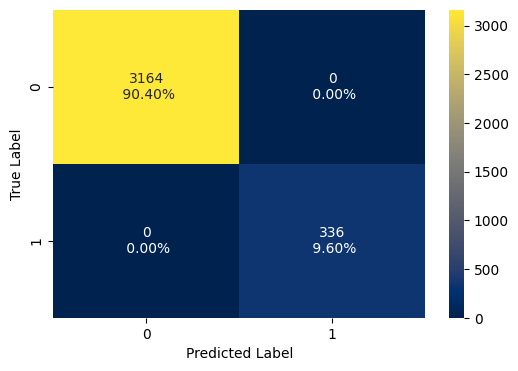

In [33]:
# Plot confusion matrix for train data
plot_confusion_matrix(dtree1, X_train, y_train)

**Observation:** Model is overfitting the training data.

In [34]:
# Check performance using test set.
dtree1_test_perf = model_performance_classification(dtree1, X_test, y_test)
dtree1_test_perf

,Accuracy,Recall,Precision,f1
0,0.98,0.909722,0.885135,0.89726


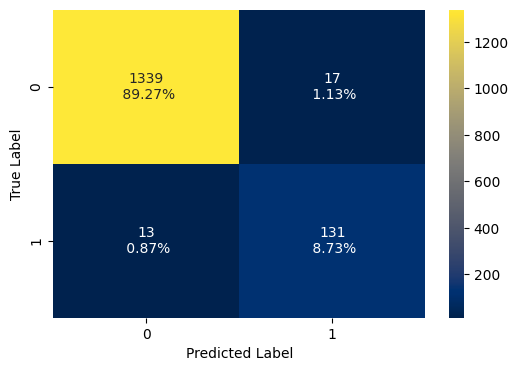

In [35]:
# Plot confusion matrix for test data
plot_confusion_matrix(dtree1, X_test, y_test)

**Observation:** While performance on test data is reasonably good, model may not generalize on unseen data due to overfitting.

#### Visualizing the decision tree

In [67]:
def plot_decision_tree(model, predictors, figsize):
  """
   Plot the decision tree for visual inspection.

   model: Decision tree model
   predictors: Input features.
   figsize: Size of the plot
  """

  # Get the feature names
  feature_names = predictors.columns.to_list()

  # Set the figure size
  plt.figure(figsize=figsize)

  # Plot the decision tree
  out = plot_tree(
      model,                             # Decision Tree Classifier
      feature_names = feature_names,      # Input feature names.
      filled=True,                        # Filled the nodes with colors based on class.
      fontsize=9,                         # font size.
      node_ids=False,                     # Do not display node ID's
      class_names=True                    # Do not display class
  )

  # Add arrows to decision tree.
  for o in out:
    arrow = o.arrow_patch

    if arrow is not None:
      arrow.set_edgecolor("black")
      arrow.set_linewidth(1)

  plt.show()   # display plot.


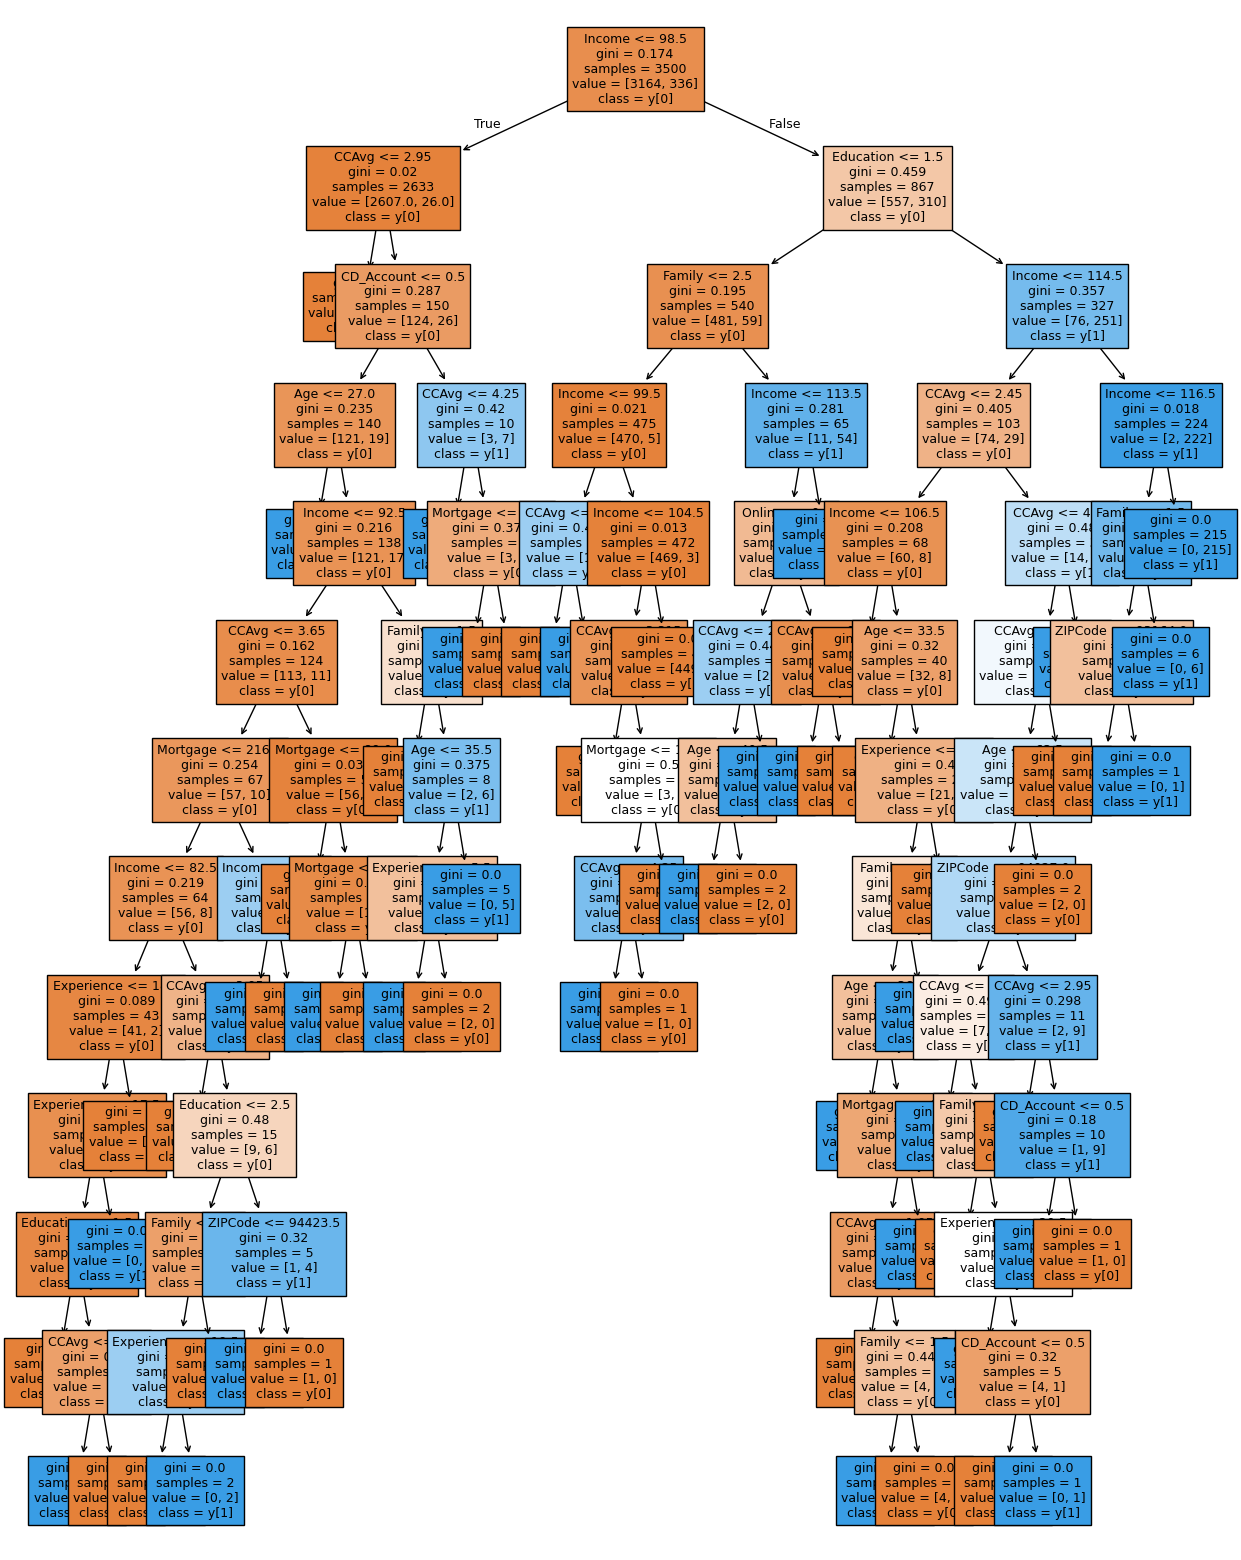

In [68]:
# Visualize the Default Decision Tree.
plot_decision_tree(dtree1, X_train, figsize=(15,20))

## Model Performance Improvement

#### Decision Tree - Prepruning

In [37]:
# Define parameters to tune

max_depth_values = np.arange(2,11,2)            # Max depth of the tree - 2,4,6,8,10
max_leaf_nodes_values = np.arange(10,51,10)     # Max classes in the leaf nodes - 10,20,30,30,50
min_samples_split_values = np.arange(10,51,10)  # Min values in the node to split.

# Initialize values for best estimator and accurance scores.
best_estimator = None
best_score_diff = float('inf')

# Iterate through each tree depth value and estimate the score.
for max_depth in max_depth_values:
  for max_leaf_nodes in max_leaf_nodes_values:
    for min_samples_split in min_samples_split_values:

      # Initialize the model
      estimator = DecisionTreeClassifier(
          max_depth=max_depth,
          max_leaf_nodes=max_leaf_nodes,
          min_samples_split=min_samples_split,
          random_state=42
      )

      # Fit the data.
      estimator.fit(X_train, y_train)

      # Predit on training and test data
      y_train_pred = estimator.predict(X_train)
      y_test_pred = estimator.predict(X_test)

      # Compute the f1 scores.
      train_f1_score = f1_score(y_train, y_train_pred)
      test_f1_score = f1_score(y_test, y_test_pred)

      # Score difference between train and test f1 scores to determine the best estimator.
      # Lowest differnce indicates the models ability to generalize the data well.
      score_diff = abs(train_f1_score - test_f1_score)

      # Check the score diff and set the best estimator
      if score_diff < best_score_diff:
        best_estimator = estimator
        best_score_diff = score_diff

In [38]:
# Check the performance of the best estimator.
dtree2 = best_estimator
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(4), max_leaf_nodes=np.int64(20),
                       min_samples_split=np.int64(10), random_state=42)

#### Model evaluation

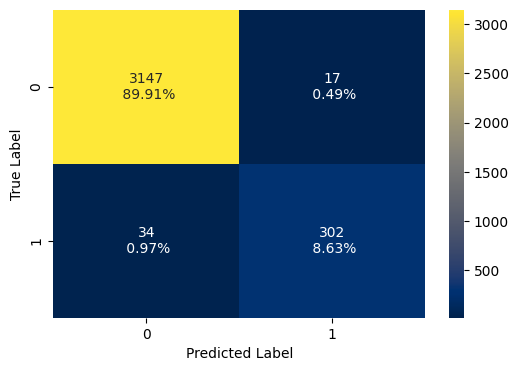

,Accuracy,Recall,Precision,f1
0,0.985429,0.89881,0.946708,0.922137


In [39]:
# Plot confusion matrix for training data
plot_confusion_matrix(dtree2, X_train, y_train)

# Check the model performance for training data
dtree2_train_perf = model_performance_classification(dtree2, X_train, y_train)
dtree2_train_perf

**Observation:** Model accuracy is 98%

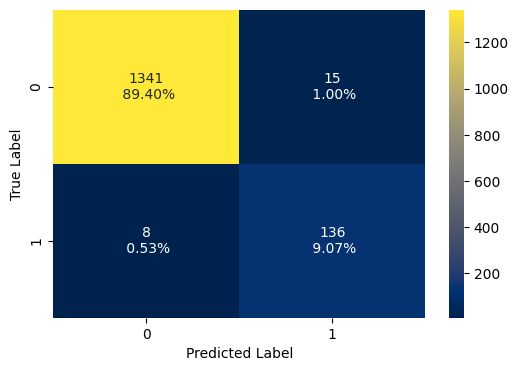

,Accuracy,Recall,Precision,f1
0,0.984667,0.944444,0.900662,0.922034


In [40]:
# Plot confusion matrix for test data
plot_confusion_matrix(dtree2, X_test, y_test)

# Check the model performance for test data
dtree2_test_perf = model_performance_classification(dtree2, X_test, y_test)
dtree2_test_perf

**Observation:** Model accuracy on test data is 98% which is almost same as trainig data accuracy. This indicates that model is generalizing well.

#### Visualize the decision tree

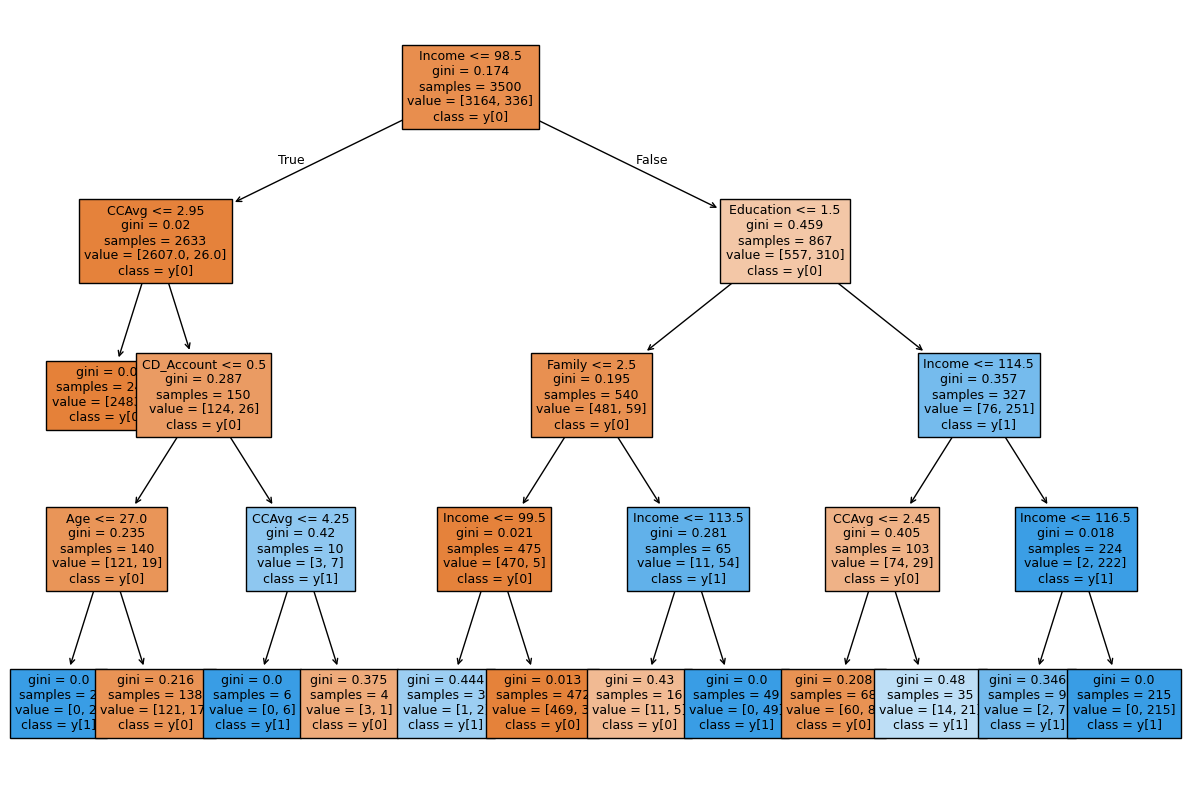

In [71]:
# plot the decision tree
plot_decision_tree(dtree2, X_train, figsize=(15,10))

#### Decision Tree - Post pruning

In [41]:
# Instantiate DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# Compute the cost complexity pruning path for mode using training data.
path = model.cost_complexity_pruning_path(X_train, y_train)

# Extract the alpha values
ccp_alphas = abs(path.ccp_alphas)

# Extract the impurities at each alpha along the pruning path.
impurities = path.impurities

# Create a data frame with alphas and impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000270,0.000540
2,0.000275,0.001090
3,0.000281,0.001651
4,0.000378,0.002784
5,0.000381,0.003165
6,0.000381,0.003546
7,0.000381,0.003927
8,0.000381,0.004308
9,0.000381,0.005069


##### Plot impurities vs ccp_alpha values

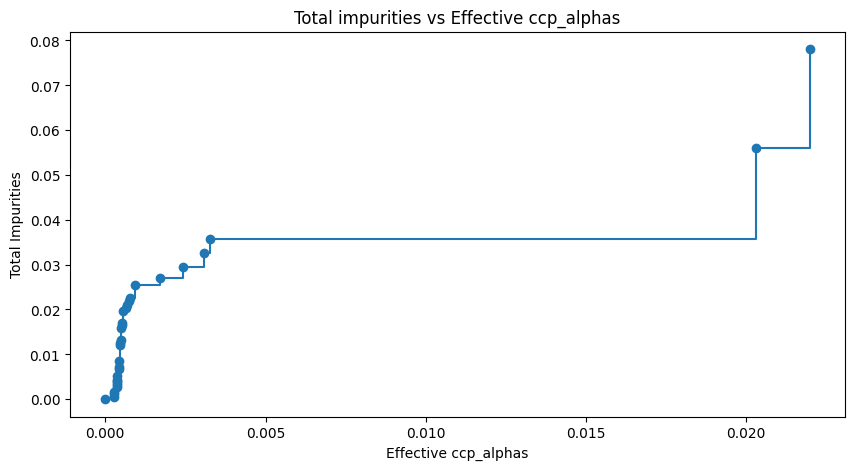

In [42]:
# Set the plots
fig, ax = plt.subplots(figsize=(10,5))

# Plot the impurities and ccp_alpha excluding last value
ax.plot( ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')

ax.set_title("Total impurities vs Effective ccp_alphas")   # Set the title.
ax.set_xlabel("Effective ccp_alphas")                      # Set X-axis label
ax.set_ylabel("Total Impurities")                          # Set Y-axis label

plt.show()   # display plot.

**Observation:** With increase in alpha value, impurity increases for training data.

In [43]:
# Fit the model with different alphas.
clfs = []

# for each alpha initialize the model and fit on training data.
for ccp_alpha in ccp_alphas:
  # Instantiate the model with alpha value
  clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)

  # Fit the training data.
  clf.fit(X_train, y_train)
  clfs.append(clf)


print(" Last model trims the tree to one node. No. of nodes = {} for ccp_alpha = {}".format(
    clfs[-1].tree_.node_count, ccp_alphas[-1]))

# Remove the last model as it doesn't make sense to trim to one node.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]


 Last model trims the tree to one node. No. of nodes = 1 for ccp_alpha = 0.04774589891961516


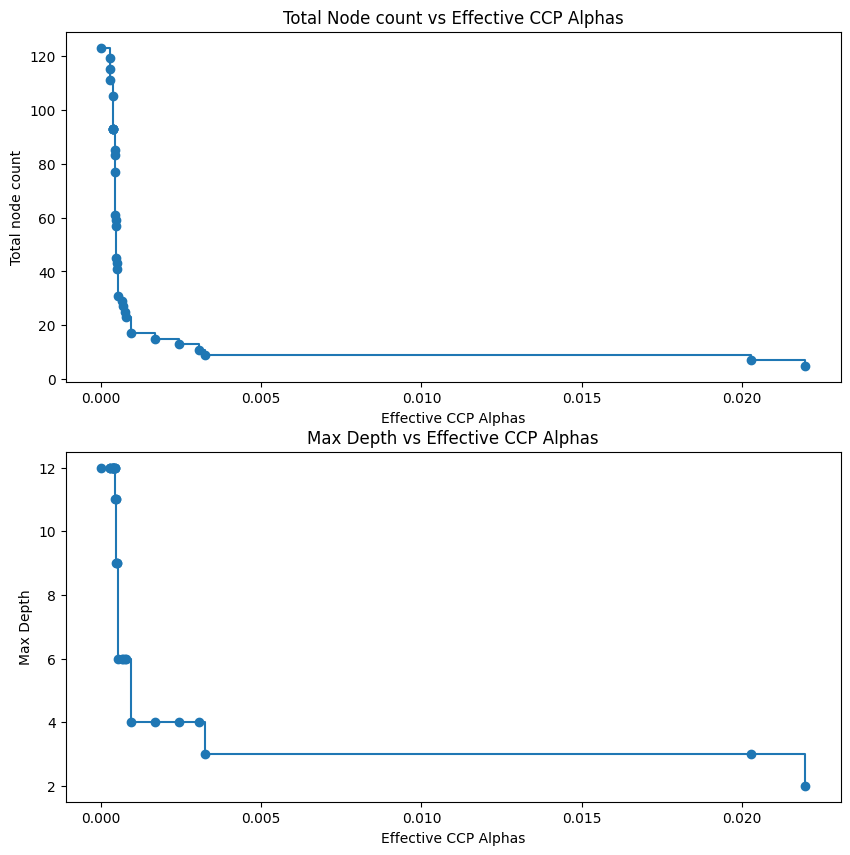

In [44]:
# Extract the no. of nodes in each model.
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the max tree depth of each model.
max_depths = [clf.tree_.max_depth for clf in clfs]

# Plot the no. of nodes vs ccp_alphas and max_depths vs ccp_alphas for visual review.

# Create subplots.
fig, ax = plt.subplots(2,1,figsize=(10,10))

# Plot the no. of nodes vs ccp_alphas
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle='steps-post')
ax[0].set_title("Total Node count vs Effective CCP Alphas")
ax[0].set_xlabel('Effective CCP Alphas')
ax[0].set_ylabel('Total node count')

# Plot the max depth vs ccp_alphas
ax[1].plot(ccp_alphas, max_depths, marker='o', drawstyle='steps-post')
ax[1].set_title("Max Depth vs Effective CCP Alphas")
ax[1].set_xlabel('Effective CCP Alphas')
ax[1].set_ylabel('Max Depth')

plt.show()    # display plot



In [45]:
# Compute f1 scores on train data set for each model.
train_f1_scores = []

for clf in clfs:
  y_pred = clf.predict(X_train)    # Predit on training data
  f1 = f1_score(y_train, y_pred)   # Compute f1 score
  train_f1_scores.append(f1)       # Append to the list

In [46]:
# Compute f1 scores on test data set for each model.
test_f1_scores = []

for clf in clfs:
  y_pred = clf.predict(X_test)    # Predit on training data
  f1 = f1_score(y_test, y_pred)   # Compute f1 score
  test_f1_scores.append(f1)       # Append to the list

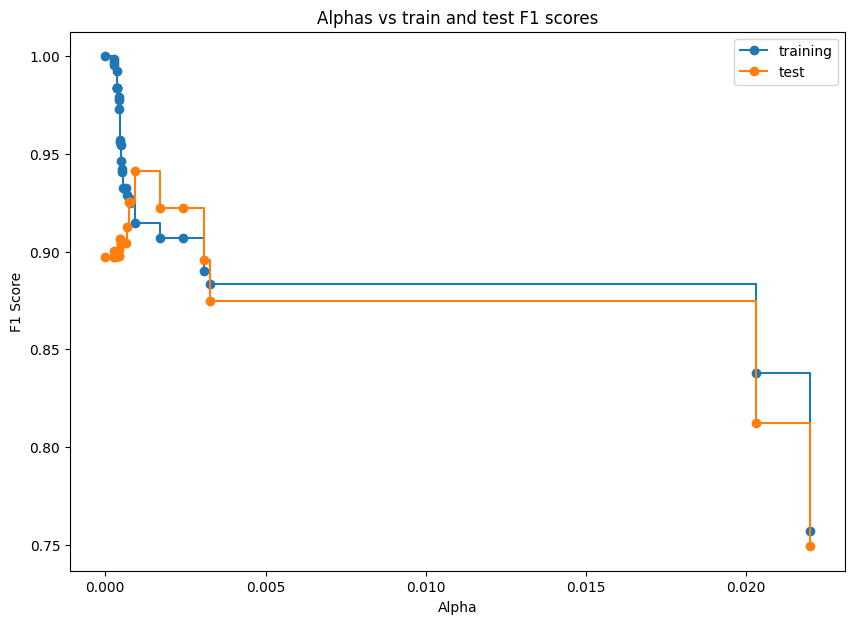

In [47]:
# Plot the f1 scores vs Alphas for both training and test datas.

fig, ax = plt.subplots(figsize=(10,7))
ax.set_title("Alphas vs train and test F1 scores")
ax.set_xlabel('Alpha')
ax.set_ylabel('F1 Score')

ax.plot(ccp_alphas, train_f1_scores, marker='o', label='training', drawstyle='steps-post')   # Train plot
ax.plot(ccp_alphas, test_f1_scores, marker='o', label='test', drawstyle='steps-post')        # Test plot

ax.legend()  # Legend

plt.show()


In [53]:
# Best model is the one with highest f1 score
best_model_index = np.argmax(test_f1_scores)

# Best model
dtree3 = clfs[best_model_index]

#### Model evaluation

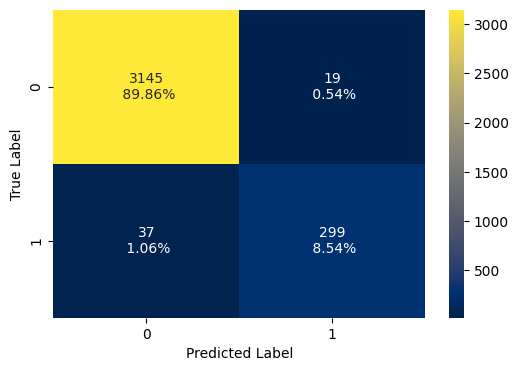

,Accuracy,Recall,Precision,f1
0,0.984,0.889881,0.940252,0.914373


In [54]:
plot_confusion_matrix(dtree3, X_train, y_train)
dtree3_train_perf = model_performance_classification(dtree3, X_train, y_train)
dtree3_train_perf



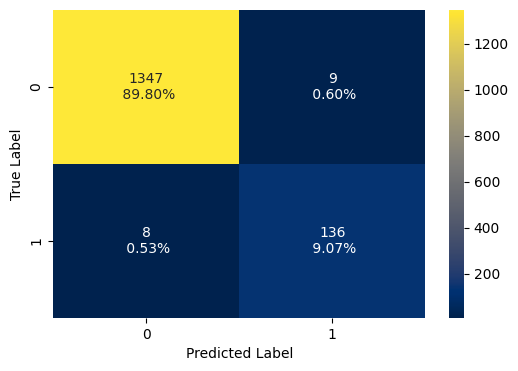

,Accuracy,Recall,Precision,f1
0,0.988667,0.944444,0.937931,0.941176


In [55]:
# Model evaluation on test data
plot_confusion_matrix(dtree3, X_test, y_test)
dtree3_test_perf = model_performance_classification(dtree3, X_test, y_test)
dtree3_test_perf


**Observation:** Model accuracy on training data is 97%, where as on test data its 100%.

#### Visualizing the Decision Tree

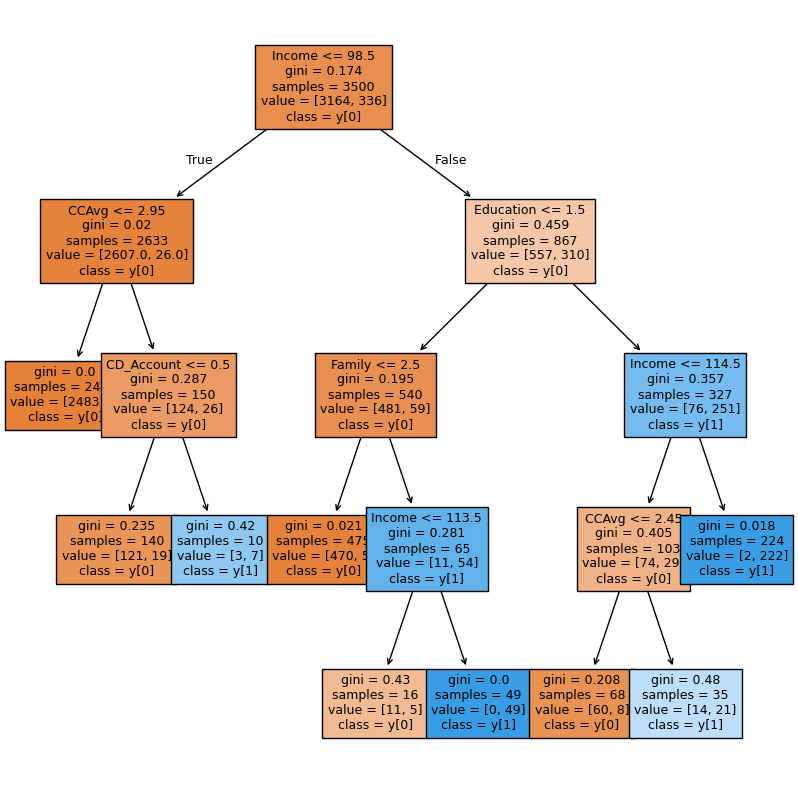

In [70]:
# plot the decision tree
plot_decision_tree(dtree3, X_train, figsize=(10,10))

## Model Performance Comparison and Final Model Selection

In [56]:
# Model performance comparision on training data

models_train_perf_df = pd.concat(
    [
        dtree1_train_perf.T,
        dtree2_train_perf.T,
        dtree3_train_perf.T
    ],axis=1
)

models_train_perf_df.columns = [
    "Training - Decision Tree Default",
    "Training - Decision Tree Pre-pruning",
    "Training - Decision Tree Post-pruning"
]

models_train_perf_df.T


,Accuracy,Recall,Precision,f1
Training - Decision Tree Default,1.000000,1.000000,1.000000,1.000000
Training - Decision Tree Pre-pruning,0.985429,0.898810,0.946708,0.922137
Training - Decision Tree Post-pruning,0.984000,0.889881,0.940252,0.914373


**Observation:**
* Default Decision Tree is overfitting the training data.
* Pre-pruning and Post-pruning Decision tree performance is comparable on training data.

In [57]:
# Model performance comparison on Test Data

models_test_perf_df = pd.concat(
    [
        dtree1_test_perf.T,
        dtree2_test_perf.T,
        dtree3_test_perf.T
    ],axis=1
)

models_test_perf_df.columns = [
    "Test - Decision Tree Default",
    "Test - Decision Tree Pre-pruning",
    "Test - Decision Tree Post-pruning"
]

models_test_perf_df.T


,Accuracy,Recall,Precision,f1
Test - Decision Tree Default,0.980000,0.909722,0.885135,0.897260
Test - Decision Tree Pre-pruning,0.984667,0.944444,0.900662,0.922034
Test - Decision Tree Post-pruning,0.988667,0.944444,0.937931,0.941176


**Observations:**
* Both Pre-pruned and Post-pruned models exhibit generalized performances.
* Pre-pruned model's accuracy is almost similar to betwee training and test.
  - At the same time, Recall went up by approximately 4.5% and Precision went down by 4.5%
  - The model uses six features in decision making.
* Post-pruned model's accuracy is slighly improved between training and test.
  - At the same time, Recall went up by approximately 5%, while Precision dropped very slightly.
  - Post-pruning model uses five features in decision-making.
* Post pruned model slightly better than pre-pruned and generalized well between training and test data. So, we will proceed with Post-pruned model.


## Feature Importance

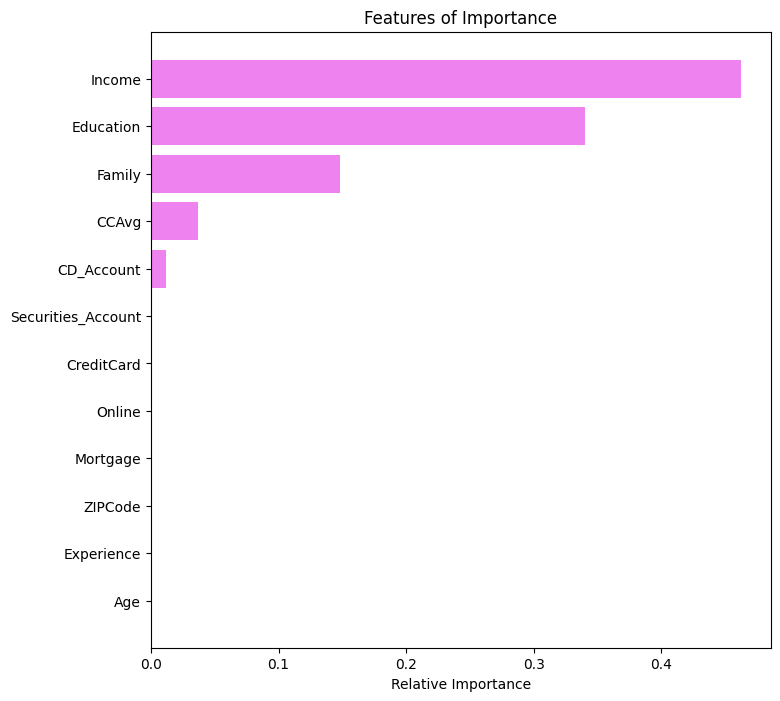

In [80]:
# Get the important features.
importances = dtree3.feature_importances_
indices = np.argsort(importances)
feature_names = X_train.columns.to_list()

plt.figure(figsize=(8,8))               # Set the plot size.
plt.title("Features of Importance")     # Set the title.
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

    - Only 31% of the customers have mortgage loan.
    - Customers with Mortgage exhibits right skewed distribution, indicating that no. of customers goes down with increase in loan amount.


2. How many customers have credit cards?
   -  Only 29.4% of the customers have Credit cards.

3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
    - Income, CCAvg (Average Credit Card Monthly spend), CD_Account, Education level, Family size.
4. How does a customer's interest in purchasing a loan vary with their age?
    - Personal Loan acceptance is low at yougest and oldest age group.
    - Loan acceptance rate is high in late 20's and 30's, fluctuates but remains consistent in the middle age, and shows increased activity in early 60's.
5. How does a customer's interest in purchasing a loan vary with their education?
    - Majority of individuals do not have a personal loan across education levels.
    - Education Level 1 has lowest proportion of loan acceptance, while Level 2 and Level 3 have slightly more and similar acceptance.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?
  - Develop targeted marketing campaigns and product offerings specifically for high-income and highly educated customer segments. These groups have demonstrated a higher personal loan acceptance rate, suggesting they are a low-risk, high-return demographic.
  - Tailor personal loan products and outreach efforts to align with the age groups showing the highest acceptance rates.
     - Younger generation in their late 20's and 30's have higher acceptance rate.
     - Older generation in their early 60's have higher acceptance rate, but device cautious approach as they present higher risk profile.
  - Focus on high-potential customers that demonstrate higher borrowing potential.
    - Customers with high-credit card usage are a good segment to target as they may be looking ways to consolidate debt and reduce interest rates.
    - Customers with high CD accounts may be open to personal loans, as they may be looking for liquidity for large purchages and are reluctant to break CD early.
  - Customers with existing mortgage loans show reluctant to take personal loans, so its recommended not to focus and invest resources on targetting this segment.

___